<a href="https://colab.research.google.com/github/ManuMel/proyectoVazquezMelchor/blob/main/Data_StoryTelling_Vazquez_Melchor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **¿Cómo generar un mejor espacio laboral para cuidar la salud mental?**

### **Contexto Comercial**

"*La salud mental incluye nuestro bienestar emocional, psicológico y social. Afecta la forma en que pensamos, sentimos y actuamos cuando enfrentamos la vida. También ayuda a determinar cómo manejamos el estrés, nos relacionamos con los demás y tomamos decisiones. La salud mental es importante en todas las etapas de la vida, desde la niñez y la adolescencia hasta la adultez y la vejez.*"

En los últimos años, se ha vuelto relevante la importancia de la salud mental en el entorno laboral, tanto por parte de los trabajadores como de los empleadores, ya que ahora al trabajador no solo le es importante el factor económico en un empleo, sino también desempeñar sus actividades en un ambiente donde se sienta a gusto y por consecuencia no se vea afectada su salud mental.

### **Problema Comercial**

A partir del data set nos podremos realizar las siguientes preguntas:


*   Al tener familiares con antecedentes, qué porcentaje de probabilidad hay que la persona que realizó la encuesta los tenga?
*   Varía según el género esa probabilidad?
*  Cuando sus trabajos son remoto, es más probable?

Al analizar las siguientes preguntas nos gustaría conocer con claridad qué personas tienen más probabilidad de que afecte su salud mental. 

Es por eso que el tipo de Aprendizaje será Supervisado de Clasificación Binaria; Predecir si una persona tendrá buena salud mental o no, en la cual tenemos que predecir si la salida pertenece a la clase uno (sí) o a clase dos (no).

Determinada predicción ayudará a que la persona que haya hecho la encuesta deba realizar, o no, un cambio dependiendo el resultado.
Se logrará mejorar el estado mental de dichas personas.









### **Contexto Analítico**

Los datos de la encuesta se concentran en un archivo excel, en donde se detalla información como la edad, el género, zona geográfica, antecedentes familiares, sector laboral, libertad para externar un padecimiento mental, importancia que el empleador le presta a la salud mental.

En base a estos datos se busca encontrar la relación que existe entre tener un padecimiento mental y el entorno laboral a traves de las variables de las distintos datos de los encuestados.

### **Análisis Explorativo de Datos**

De manera preliminar se realiza un análisis en un notebook de colab con las siguientes librerías:
* pandas
* numpy
* matplotlib




aplicadas a las variables:
* gender
* remote_work


# ejercicios con **matplotlib**

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Data Sets'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Data Sets


In [ ]:
df_encuesta = pd.read_excel('survey1edit_v2.xlsx')
df_encuesta.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,first_job,time_in_job
0,2014-08-27 11:29:00,37.0,Female,United States,IL,No,No,Yes,Often,30-50,...,No,Some of them,Yes,No,Maybe,Yes,No,NaN,21.0,16.0
1,2014-08-27 11:29:00,44.0,Male,United States,IN,No,No,No,Rarely,1000-5000,...,No,No,No,No,No,Don't know,No,NaN,21.0,23.0
2,2014-08-27 11:29:00,32.0,Male,Canada,NaN,No,No,No,Rarely,30-50,...,No,Yes,Yes,Yes,Yes,No,No,NaN,22.0,10.0
3,2014-08-27 11:29:00,31.0,Male,United Kingdom,NaN,No,Yes,Yes,Often,50-100,...,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,22.0,9.0
4,2014-08-27 11:30:00,31.0,Male,United States,TX,No,No,No,Never,100-500,...,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,20.0,11.0


Al principio, se genera un gráfico de barras con los géneros que participan en la encuesta.

Male            1578
Female           392
Other             31
Trans-female       4
Non-binary         2
Name: Gender, dtype: int64


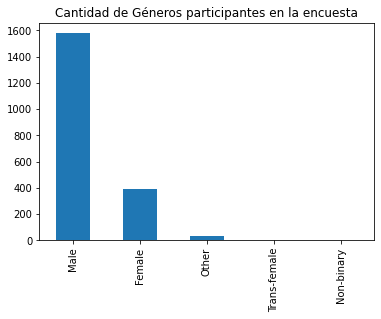

In [ ]:
# realizamos un gráfico de barras con los géneros participantes en la encuesta
df_encuesta["Gender"].value_counts().plot(kind="bar", title="Cantidad de Géneros participantes en la encuesta") 
print(df_encuesta["Gender"].value_counts())

Visualizamos que "Male" ha contestado la encuesta en mayor medida.

Después, realizamos un gráfico de torta para poder ver quiénes trabajan de forma remota.

No     1416
Yes     591
Name: remote_work, dtype: int64


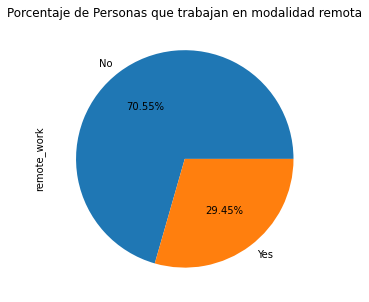

In [ ]:
# hacemos un gráfico de torta con las personas que trabajan en forma remota
df_encuesta["remote_work"].value_counts().plot(kind="pie", autopct="%.2f%%", title="Porcentaje de Personas que trabajan en modalidad remota", figsize=(7, 5)) 
print(df_encuesta["remote_work"].value_counts())

Visualizamos que hay más personas que no trabajan remotamente.

Por último, agrupamos por género si trabajan remotamente o no.

In [ ]:
# agrupamos por género si trabajan remotamente o no
remotegender = df_encuesta.groupby(["remote_work", "Gender"]).size()
remotegender

remote_work  Gender      
No           Female           285
             Male            1107
             Non-binary         2
             Other             18
             Trans-female       4
Yes          Female           107
             Male             471
             Other             13
dtype: int64

Lo pasamos a una tabla

In [ ]:
# lo pasamos a tabla
remotegender = remotegender.reset_index()
remotegender

,remote_work,Gender,0
0,No,Female,285
1,No,Male,1107
2,No,Non-binary,2
3,No,Other,18
4,No,Trans-female,4
5,Yes,Female,107
6,Yes,Male,471
7,Yes,Other,13


Hacemos una tabla pivote para crear solo 3 columnas y que los valores sean solo las cantidades de generos repetidos.

In [ ]:
# creamos una tabla pivote para crear solo 3 columnas y que los valores sean solo las cantidades de generos repetidos
remotegender = pd.pivot_table(remotegender,columns="remote_work", index="Gender", values=0)
remotegender

remote_work,No,Yes
Gender,,
Female,285.0,107.0
Male,1107.0,471.0
Non-binary,2.0,NaN
Other,18.0,13.0
Trans-female,4.0,NaN


Realizamos un gráfico de barras llamando a dicha tabla.

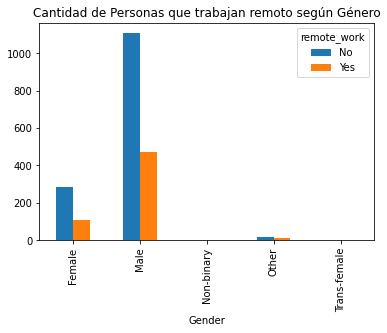

In [ ]:
# se crea gráfico de barras 
remotegender.plot(kind="bar", title="Cantidad de Personas que trabajan remoto según Género")

Visualizamos que el género “Male” trabaja más remotamente que otros géneros. Luego de esta realización con gráficos podremos observar un análisis más profundo hacia cómo impacta en la salud mental el trabajo remoto, qué género se verá más afectado y qué diferencias encontramos al ver que tienen antecedentes familiares o han tomado medicamentos.

Luego, de manera preliminar se realiza un análisis en un notebook de colab con las siguientes librerías:
* pandas
* numpy
* seaborn

aplicadas a las variables:
* Age
* Gender
* work_interfere
* wellness_program
* tech_company


# ejercicios con **seaborn**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/Data Sets

/content/gdrive/MyDrive/Data Sets


In [ ]:
df_encuesta = pd.read_excel('survey1edit_v2.xlsx')
df_encuesta.head() 

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,first_job,time_in_job
0,2014-08-27 11:29:00,37.0,Female,United States,IL,No,No,Yes,Often,30-50,...,No,Some of them,Yes,No,Maybe,Yes,No,NaN,21.0,16.0
1,2014-08-27 11:29:00,44.0,Male,United States,IN,No,No,No,Rarely,1000-5000,...,No,No,No,No,No,Don't know,No,NaN,21.0,23.0
2,2014-08-27 11:29:00,32.0,Male,Canada,NaN,No,No,No,Rarely,30-50,...,No,Yes,Yes,Yes,Yes,No,No,NaN,22.0,10.0
3,2014-08-27 11:29:00,31.0,Male,United Kingdom,NaN,No,Yes,Yes,Often,50-100,...,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,22.0,9.0
4,2014-08-27 11:30:00,31.0,Male,United States,TX,No,No,No,Never,100-500,...,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,20.0,11.0


En primera instancia se genera un gráfico de barras para conocer el género la población, en donde la mayoría se identifican con el género “Male”

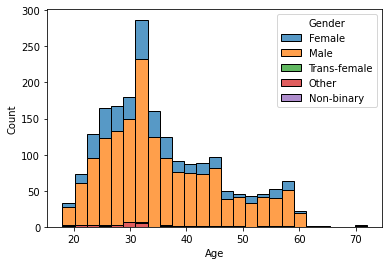

In [ ]:
# se genera un histograma para conocer la edad por genero dentro de la población
sns.histplot(data=df_encuesta, x="Age", hue="Gender", multiple="stack")

In [ ]:
# se genera la estadística descriptiva del valor "Age"
df_encuesta.Age.describe()

count    2007.000000
mean       35.436472
std        10.164393
min        18.000000
25%        28.000000
50%        33.000000
75%        42.000000
max        72.000000
Name: Age, dtype: float64

Posteriormente, se obtiene la edad promedio obteniendo un valor de 35 años.

Ahora se busca conocer si los encuestados que padecen de una condición mental, sienten que esta interfiere con su desempeño laboral, en donde las opciones son:
1.       Often
2.       Rarely
3.       Never
4.       Sometimes


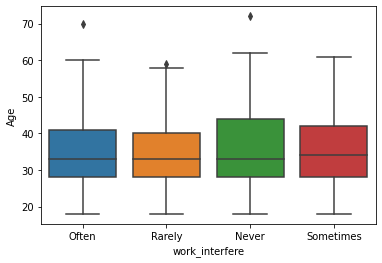

In [ ]:
# se genera un boxplot en base al campo "work_interference" para saber si dentro de la población, las personas que padecen de una condicón mental sienten que esta interfiere con su trabajo
ax = sns.boxplot(x="work_interfere", y="Age", data=df_encuesta)

Del resultado anterior, se analiza el grupo de personas que respondieron “Often” para saber si tienen conocimiento de un programa de bienestar por parte del empleador


In [ ]:
# se genera el dataset "often" con los datos de la población que padece una condición mental que "a menudo" siente que esta interfiere con su trabajo
often = df_encuesta[df_encuesta.work_interfere=="Often"]
often.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,first_job,time_in_job
0,2014-08-27 11:29:00,37.0,Female,United States,IL,No,No,Yes,Often,30-50,...,No,Some of them,Yes,No,Maybe,Yes,No,NaN,21.0,16.0
3,2014-08-27 11:29:00,31.0,Male,United Kingdom,NaN,No,Yes,Yes,Often,50-100,...,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,22.0,9.0
22,2014-08-27 11:35:00,46.0,Male,United States,MA,No,No,Yes,Often,50-100,...,No,Some of them,Yes,No,Maybe,No,No,NaN,22.0,24.0
43,2014-08-27 11:43:00,18.0,Male,Netherlands,NaN,No,No,No,Often,30-50,...,Maybe,No,Some of them,No,No,No,No,NaN,18.0,0.0
50,2014-08-27 11:44:00,22.0,Male,United States,TX,No,Yes,Yes,Often,30-50,...,No,No,No,No,Maybe,Don't know,No,NaN,20.0,2.0


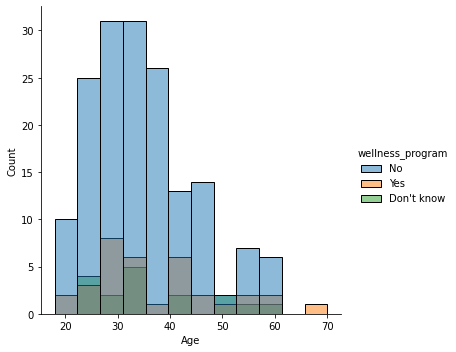

In [ ]:
# se genera una gráfica de distribución del dataset "often" para conocer si la población tiene conocimiento de algún programa de bienestar por parte de su empleador para tratar la salud mental
sns.displot(data=often, x="Age", hue="wellness_program")

En base al último resultado, se muestra que la gran mayoría no tienen conocimiento de algún programa, y se identifica que un gran número de los encuestados se encuentran en una edad entre 25 y 35 años


In [ ]:
# en base a la información obtenida de la gráfica  anterior, se genera el dataset "age_25_35" para agrupar la población con una edad entre 25 y 35 años
age_25_35 = often[often.Age.between(25, 35)]
age_25_35.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,first_job,time_in_job
3,2014-08-27 11:29:00,31.0,Male,United Kingdom,NaN,No,Yes,Yes,Often,50-100,...,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,22.0,9.0
59,2014-08-27 11:47:00,33.0,Male,Canada,NaN,No,Yes,Yes,Often,30-50,...,No,No,No,No,Maybe,Don't know,No,In addition to my own mental health issues I'v...,21.0,12.0
83,2014-08-27 12:03:00,27.0,Other,United States,NY,Yes,No,Yes,Often,500-700,...,Maybe,Some of them,Yes,No,Maybe,Yes,No,NaN,23.0,4.0
99,2014-08-27 12:18:00,30.0,Male,United States,IN,No,No,Yes,Often,500-700,...,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN,21.0,9.0
157,2014-08-27 12:43:00,26.0,Male,United States,OK,No,No,No,Often,50-100,...,Maybe,Some of them,Yes,No,Maybe,No,No,NaN,23.0,3.0


In [ ]:
age_25_35.shape

(105, 29)

Este último grupo, se clasifica entre encuestados que trabajan en empresas relacionadas con tecnología y empresas de algún otro sector.


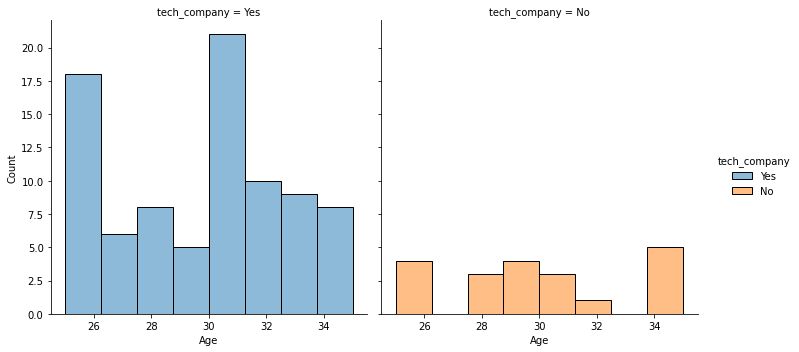

In [ ]:
# con el dataset "age_25_35" se genera un gráfica de distribución para saber si la población trabaja en empresas relacionadas con la tecnología
sns.displot(data=age_25_35, x="Age", hue="tech_company", col="tech_company")

Con esto se puede tener un informe previo, de que las personas que padecen alguna condición mental la cual interfiere con su trabajo, regularmente se encuentran en el ramo tecnológico y en su mayoría no cuentan con un programa de bienestar para el tratamiento de la salud mental.

# Árbol de Decisión

In [ ]:
# consultamos el tamaño del data frame
df_encuesta1 = pd.read_excel('survey1edit_v3.xlsx')
df_encuesta1.head() 
df_encuesta1.shape

(2007, 29)

In [ ]:
# mostramos las variables disponibles
features = df_encuesta1.columns.tolist()
features

['Timestamp',
 'Age',
 'Gender',
 'Country',
 'state',
 'family_history',
 'treatment',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence',
 'comments',
 'first_job',
 'time_in_job',
 'mental_health']

### Variables potencialmente interesantes:

1. **Age:** OK Edad (años)
2. **Gender:** OK Género (Female = 0, Male = 1, Trans-female = 2, Non-binary = 3, Other = 4)
3. **Country:** maybe País (United States = 0, Canadá = 1, United Kingdom = 2, Bulgaria = 3, France = 4, Portugal = 5, Netherlands = 6, Switzerland = 7, Poland = 8, Australia = 9, Germany = 10, Russia = 11, Mexico = 12, Brazil = 13, Slovenia = 14, Costa Rica = 15, Austria = 16, Ireland = 17, India = 18, South Africa = 19, Italy = 20, Sweden = 21, Colombia = 22, Latvia = 23, Romania = 24, Belgium = 25, New Zealand = 26, Zimbabwe = 27, Spain = 28, Finland = 29, Uruguay = 30, Israel = 31, Bosnia and Herzegovina = 32, Hungary = 33, Singapore = 34, Japan = 35, Nigeria = 36, Croatia = 37, Norway = 38, Thailand = 39, Denmark = 40, Bahamas = 41, Greece = 42, Moldova = 43, Georgia = 44, China = 45, Czech Republic = 46, Philippines = 47)
4. **Family_history:** OK Tiene antecedentes familiares con enfermedades mentales? (No = 0, Yes = 1)
5. **Treatment:** comparar con no. 6 Tenes tratamiento para una condición de salud mental? (No = 0, Yes = 1)
6. **Work_interfere:** comparar con no. 5 Si tenes una condición de salud mental, sentís que interfiere con tu trabajo? (Often = 0, Rarely = 1, Never = 2, Sometimes = 3, NA = 4)
7. **Remote_work:** OK Trabajas de forma remota (fuera de una oficina) al menos el 50% del tiempo? (No = 0, Yes = 1)
8. **Tech_company:** OK Su empleador es principalmente una empresa/organización tecnológica? (No = 0, Yes = 1)
9. **Benefits:** NO Su empleador brinda beneficios de salud mental? (No = 0, Yes = 1, Don't know = 2)
10. **Care_options:** NO Conoce las opciones de atención de salud mental que ofrece su empleador? (No = 0, Yes = 1, Not sure = 2)
11. **Wellness_program:** NO Alguna vez su empleador ha hablado sobre la salud mental como parte de un programa de bienestar para empleados? (No = 0, Yes = 1, Don't know = 2)
12. **Seek_help:** NO Su empleador proporciona recursos para obtener más información sobre problemas de salud mental y cómo buscar ayuda? (No = 0, Yes = 1, Don't know = 2)
13. **Anonymity:** NO Está protegido su anonimato si elige aprovechar los recursos de tratamiento de salud mental o abuso de sustancias? (No = 0, Yes = 1, Don't know = 2)
14. **Leave:** OK (comparar) Qué tan fácil es para usted tomar una licencia médica por una condición de salud mental? (Somewhat easy = 0, Don't know = 1, Somewhat difficult = 2, Very difficult = 3, Very easy = 4)
15. **Mental_health_consequence:** NO Cree que discutir un problema de salud mental con su empleador tendría consecuencias negativas? (No = 0, Yes = 1, Maybe = 2)
 
16. **Phys_health_consequence:** NO Cree que discutir un problema de salud física con su empleador tendría consecuencias negativas? (No = 0, Yes = 1, Maybe = 2)
17. **Coworkers:** NO Estaría dispuesto a discutir un problema de salud mental con sus compañeros de trabajo? (No = 0, Yes = 1, Some of them = 2)
18. **Supervisor:** NO Estaría dispuesto a discutir un problema de salud mental con su(s) supervisor(es) directo(s)? (No = 0, Yes = 1, Some of them = 2)
19. **Mental_health_interview:** NO Hablaría sobre un problema de salud mental con un empleador potencial en una entrevista? (No = 0, Yes = 1, Maybe = 2)
20. **Phys_health_interview:** NO Hablaría sobre un problema de salud física con un empleador potencial en una entrevista? (No = 0, Yes = 1, Maybe = 2)
21. **Mental_vs_physical:** NO Siente que su empleador se toma la salud mental tan en serio como la salud física? (No = 0, Yes = 1, Don't know = 2)
22. **Obs_consequence:** NO Escucho hablar u observó consecuencias negativas para los compañeros de trabajo con problemas de salud mental en su lugar de trabajo? (No = 0, Yes = 1)
23. **First_job** OK A qué edad fue tu primer trabajo? (años)
24. **Time_in_job** OK Cuántos años llevas trabajando? (años)
25. **Mental_health** Posee buena salud mental? (No = 0, Yes = 1)
 



In [ ]:
# eliminamos las variables que no utilizaremos
items_to_remove = ['Timestamp','state','no_employees','comments','Country']

In [ ]:
# volvemos a mostrar las variables
features = [i for i in features if i not in items_to_remove]
features

['Age',
 'Gender',
 'family_history',
 'treatment',
 'work_interfere',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence',
 'first_job',
 'time_in_job',
 'mental_health']

In [ ]:
# importamos las librerias
import graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree

In [ ]:
# Separamos al dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(df_encuesta1[features[:-1]].values, df_encuesta1['mental_health'].values,
                 test_size=0.2, random_state=24)

In [ ]:
# definimos el número de niveles que tendrá el árbol
dt = tree.DecisionTreeClassifier(max_depth=2)

In [ ]:
dt.fit(X_train, y_train) # Ajustamos el modelo

DecisionTreeClassifier(max_depth=2)

In [ ]:
dot_data = tree.export_graphviz(dt,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                proportion=True,
                                feature_names=features[:-1],
                                class_names=
                                    ['no','si']
                                )

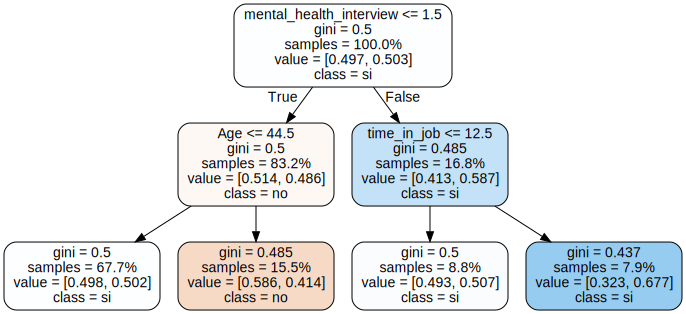

In [ ]:
graph = graphviz.Source(dot_data)
graph

In [ ]:
# se realizaun segundo árbol para comparar resultados
from sklearn.tree import DecisionTreeClassifier

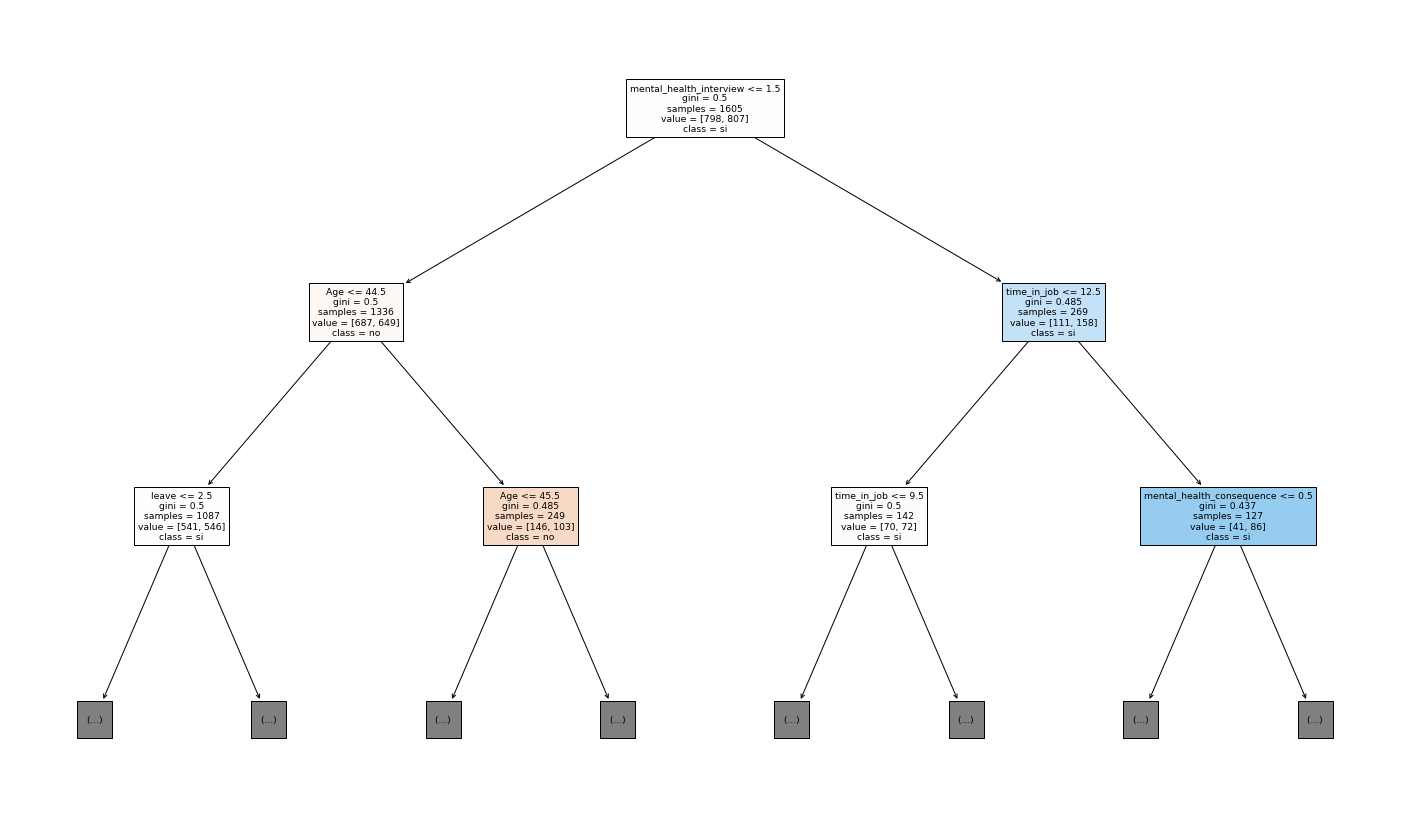

In [ ]:
clf = DecisionTreeClassifier(random_state=24) # random_state sirve para dar reproducibilidad
model = clf.fit(X_train, y_train)

# Graficando
fig = plt.figure(figsize=(25,15))
tree.plot_tree(clf,
               feature_names = features[:-1],  
               class_names =  ['no','si'],
               filled=True,
               max_depth=2
               )
plt.show()

In [ ]:
features[:-1].index('mental_health_interview') # localizamos la posición de mental_health_interview en el listado

17

In [ ]:
X_train.shape # Verificamos que se cumpla con la división 80-20 

(1605, 23)

Es correcto ya que al hacer 1605/2007 nos da como resultado 0,79. El 80% es para entrenamiento.

In [ ]:
# Basados en la posición y el número de elementos en el conjunto train obtenemos la misma proporción que en el arbol
(X_train[:,17] <= 1.5).sum()/X_train.shape[0] 

0.832398753894081

# Feature Selection : 
## Forward Selection

In [ ]:
df_encuesta2 = pd.read_excel('survey1edit_v4.xlsx')
df_encuesta2.head() 

,Age,Gender,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,first_job,time_in_job,mental_health
0,37,0,0,1,0,0,1,1,2,0,...,0,2,1,0,2,1,0,21,16,0
1,44,1,0,0,1,0,0,2,0,2,...,0,0,0,0,0,2,0,21,23,0
2,32,1,0,0,1,0,1,0,0,0,...,0,1,1,1,1,0,0,22,10,1
3,31,1,1,1,0,0,1,0,1,0,...,1,2,0,2,2,0,1,22,9,1
4,31,1,0,0,2,1,1,1,0,2,...,0,2,1,1,1,2,0,20,11,0


In [ ]:
X = df_encuesta2.drop('mental_health', 1)       # feature matrix
y = df_encuesta2['mental_health']               # target feature
df_encuesta2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Age,Gender,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,first_job,time_in_job,mental_health
0,37,0,0,1,0,0,1,1,2,0,...,0,2,1,0,2,1,0,21,16,0
1,44,1,0,0,1,0,0,2,0,2,...,0,0,0,0,0,2,0,21,23,0
2,32,1,0,0,1,0,1,0,0,0,...,0,1,1,1,1,0,0,22,10,1
3,31,1,1,1,0,0,1,0,1,0,...,1,2,0,2,2,0,1,22,9,1
4,31,1,0,0,2,1,1,1,0,2,...,0,2,1,1,1,2,0,20,11,0


In [ ]:
X

,Age,Gender,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,first_job,time_in_job
0,37,0,0,1,0,0,1,1,2,0,...,0,0,2,1,0,2,1,0,21,16
1,44,1,0,0,1,0,0,2,0,2,...,2,0,0,0,0,0,2,0,21,23
2,32,1,0,0,1,0,1,0,0,0,...,0,0,1,1,1,1,0,0,22,10
3,31,1,1,1,0,0,1,0,1,0,...,1,1,2,0,2,2,0,1,22,9
4,31,1,0,0,2,1,1,1,0,2,...,0,0,2,1,1,1,2,0,20,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,46,1,0,0,4,1,1,2,2,1,...,0,0,2,0,0,2,1,0,19,27
2003,45,1,1,1,3,0,1,2,2,2,...,2,0,2,2,0,0,2,0,21,24
2004,50,1,0,0,2,0,1,0,0,0,...,0,0,2,1,2,2,1,0,21,29
2005,46,1,0,0,2,0,1,1,1,1,...,0,0,2,1,0,0,1,0,21,25


In [ ]:
y

0       0
1       0
2       1
3       1
4       0
       ..
2002    0
2003    0
2004    0
2005    0
2006    0
Name: mental_health, Length: 2007, dtype: int64

In [ ]:
import statsmodels.api as sm

# creamos una función para que realice este proceso.
# la función necesita tres parametros y minimamente dos, data y target
# el tercero es opcional, si no se da se toma el valor predefinido SL=0.01
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
forward_selection(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/

['mental_health_interview']

## Metricas algoritmos de clasificacion

In [ ]:
 from sklearn.ensemble import RandomForestClassifier # Usaremos como clasificador un bosque aleatorio
 from sklearn.model_selection import train_test_split # vamos a separar nuestro dataset
 from sklearn import metrics # vamos a medir el desempeño
 import pandas as pd
 import numpy as np
 from matplotlib import pyplot as plt
 import seaborn as sns
 sns.set_style('whitegrid')

In [ ]:
# definimos matriz de diseño X y vector respuesta y
X = df_encuesta2.drop('mental_health', 1)
y = abs(pd.Series(df_encuesta2['mental_health'])-1)

# Separamos en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

# Creamos un modelo Random Forest con parametros por defect
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

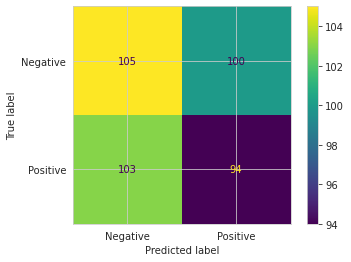

In [ ]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelo, X_test, y_test, display_labels=['Negative', 'Positive'])

In [ ]:
confusion = metrics.confusion_matrix(y_test, preds)
confusion
#confusion.ravel()

array([[105, 100],
       [103,  94]])

In [ ]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy 

0.49502487562189057

In [ ]:
# Precision se evalua para cada categoria
precision_positiva = metrics.precision_score(y_test, preds, pos_label=1)
precision_negativa = metrics.precision_score(y_test, preds, pos_label=0)
precision_positiva, precision_negativa 

(0.4845360824742268, 0.5048076923076923)

In [ ]:
recall_sensibilidad = metrics.recall_score(y_test, preds, pos_label=1)
recall_especificidad= metrics.recall_score(y_test, preds, pos_label=0)
recall_sensibilidad, recall_especificidad

(0.47715736040609136, 0.5121951219512195)

In [ ]:
f1_positivo = metrics.f1_score(y_test, preds, pos_label=1)
f1_negativo = metrics.f1_score(y_test, preds, pos_label=0)
f1_positivo, f1_negativo 

(0.48081841432225064, 0.5084745762711864)

In [ ]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.50      0.51      0.51       205
           1       0.48      0.48      0.48       197

    accuracy                           0.50       402
   macro avg       0.49      0.49      0.49       402
weighted avg       0.49      0.50      0.49       402



## Variables Dummy 

In [ ]:
df_encuesta3 = pd.read_excel('survey1edit_v5.xlsx')
df_encuesta3.head()

,Age,Gender,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,first_job,time_in_job,mental_health
0,37,Female,No,Yes,Often,No,Yes,Yes,Not sure,No,...,No,Some of them,Yes,No,Maybe,Yes,No,21,16,No
1,44,Male,No,No,Rarely,No,No,Don't know,No,Don't know,...,No,No,No,No,No,Don't know,No,21,23,No
2,32,Male,No,No,Rarely,No,Yes,No,No,No,...,No,Yes,Yes,Yes,Yes,No,No,22,10,Yes
3,31,Male,Yes,Yes,Often,No,Yes,No,Yes,No,...,Yes,Some of them,No,Maybe,Maybe,No,Yes,22,9,Yes
4,31,Male,No,No,Never,Yes,Yes,Yes,No,Don't know,...,No,Some of them,Yes,Yes,Yes,Don't know,No,20,11,No


In [ ]:
df_encuesta3.shape

(2007, 24)

In [ ]:
# mostramos las variables disponibles
features = df_encuesta3.columns.tolist()
features

['Age',
 'Gender',
 'family_history',
 'treatment',
 'work_interfere',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence',
 'first_job',
 'time_in_job',
 'mental_health']

In [ ]:
# Generamos las variables dummys de las Columnas 'Gender','family_history','treatment','work_interfere','remote_work',
# 'tech_company','benefits','care_options','wellness_program', 'seek_help','anonymity','leave','mental_health_consequence','phys_health_consequence',
# 'coworkers','supervisor','mental_health_interview','phys_health_interview','mental_vs_physical','obs_consequence' y 'mental_health'

gender_dummy = pd.get_dummies(df_encuesta3["Gender"], prefix="Gender")
family_history_dummy = pd.get_dummies (df_encuesta3["family_history"], prefix="family_history")
treatment_dummy = pd.get_dummies (df_encuesta3["treatment"], prefix="treatment")
work_interfere_dummy = pd.get_dummies(df_encuesta3["work_interfere"], prefix="work_interfere")
remote_work_dummy = pd.get_dummies(df_encuesta3["remote_work"], prefix="remote_work")
tech_company_dummy = pd.get_dummies(df_encuesta3["tech_company"], prefix="tech_company")
benefits_dummy = pd.get_dummies(df_encuesta3["benefits"], prefix="benefits")
care_options_dummy = pd.get_dummies(df_encuesta3["care_options"], prefix="care_options")
wellness_program_dummy = pd.get_dummies(df_encuesta3["wellness_program"], prefix="wellness_program")
seek_help_dummy = pd.get_dummies(df_encuesta3["seek_help"], prefix="seek_help")
anonymity_dummy = pd.get_dummies(df_encuesta3["anonymity"], prefix="anonymity")
leave_dummy = pd.get_dummies(df_encuesta3["leave"], prefix="leave")
mental_health_consequence_dummy = pd.get_dummies(df_encuesta3["mental_health_consequence"], prefix="mental_health_consequence")
phys_health_consequence_dummy = pd.get_dummies(df_encuesta3["phys_health_consequence"], prefix="phys_health_consequence")
coworkers_dummy = pd.get_dummies(df_encuesta3["coworkers"], prefix="coworkers")
supervisor_dummy = pd.get_dummies(df_encuesta3["supervisor"], prefix="supervisor")
mental_health_interview_dummy = pd.get_dummies(df_encuesta3["mental_health_interview"], prefix="mental_health_interview")
phys_health_interview_dummy = pd.get_dummies(df_encuesta3["phys_health_interview"], prefix="phys_health_interview")
mental_vs_physical_dummy = pd.get_dummies(df_encuesta3["mental_vs_physical"], prefix="mental_vs_physical")
obs_consequence_dummy = pd.get_dummies(df_encuesta3["obs_consequence"], prefix="obs_consequence")
mental_health_dummy = pd.get_dummies(df_encuesta3["mental_health"], prefix="mental_health")

In [ ]:
# Unimos las variables de tipo dummy al data set que tenemos
df_encuesta3 = pd.concat([df_encuesta3, gender_dummy], axis = 1)
df_encuesta3 = pd.concat([df_encuesta3, family_history_dummy], axis = 1)
df_encuesta3 = pd.concat([df_encuesta3, treatment_dummy], axis = 1)
df_encuesta3 = pd.concat([df_encuesta3, work_interfere_dummy], axis = 1)
df_encuesta3 = pd.concat([df_encuesta3, remote_work_dummy], axis = 1)
df_encuesta3 = pd.concat([df_encuesta3, tech_company_dummy], axis = 1)
df_encuesta3 = pd.concat([df_encuesta3, benefits_dummy], axis = 1)
df_encuesta3 = pd.concat([df_encuesta3, care_options_dummy], axis = 1)
df_encuesta3 = pd.concat([df_encuesta3, wellness_program_dummy], axis = 1)
df_encuesta3 = pd.concat([df_encuesta3, seek_help_dummy], axis = 1)
df_encuesta3 = pd.concat([df_encuesta3, anonymity_dummy], axis = 1)
df_encuesta3 = pd.concat([df_encuesta3, leave_dummy], axis = 1)
df_encuesta3 = pd.concat([df_encuesta3, mental_health_consequence_dummy], axis = 1)
df_encuesta3 = pd.concat([df_encuesta3, phys_health_consequence_dummy], axis = 1)
df_encuesta3 = pd.concat([df_encuesta3, coworkers_dummy], axis = 1)
df_encuesta3 = pd.concat([df_encuesta3, supervisor_dummy], axis = 1)
df_encuesta3 = pd.concat([df_encuesta3, mental_health_interview_dummy], axis = 1)
df_encuesta3 = pd.concat([df_encuesta3, phys_health_interview_dummy], axis = 1)
df_encuesta3 = pd.concat([df_encuesta3, mental_vs_physical_dummy], axis = 1)
df_encuesta3 = pd.concat([df_encuesta3, obs_consequence_dummy], axis = 1)
df_encuesta3 = pd.concat([df_encuesta3, mental_health_dummy], axis = 1)


In [ ]:
df_encuesta3

,Age,Gender,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,...,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_No,obs_consequence_Yes,mental_health_No,mental_health_Yes
0,37,Female,No,Yes,Often,No,Yes,Yes,Not sure,No,...,1,0,0,0,0,1,1,0,1,0
1,44,Male,No,No,Rarely,No,No,Don't know,No,Don't know,...,0,1,0,1,0,0,1,0,1,0
2,32,Male,No,No,Rarely,No,Yes,No,No,No,...,0,0,1,0,1,0,1,0,0,1
3,31,Male,Yes,Yes,Often,No,Yes,No,Yes,No,...,1,0,0,0,1,0,0,1,0,1
4,31,Male,No,No,Never,Yes,Yes,Yes,No,Don't know,...,0,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,46,Male,No,No,NaN,Yes,Yes,Don't know,Not sure,Yes,...,1,0,0,0,0,1,1,0,1,0
2003,45,Male,Yes,Yes,Sometimes,No,Yes,Don't know,Not sure,Don't know,...,0,1,0,1,0,0,1,0,1,0
2004,50,Male,No,No,Never,No,Yes,No,No,No,...,1,0,0,0,0,1,1,0,1,0
2005,46,Male,No,No,Never,No,Yes,Yes,Yes,Yes,...,0,1,0,0,0,1,1,0,1,0


In [ ]:
# Eliminamos las columnas que no son tipo dummy
df_encuesta3_dummies = df_encuesta3.drop(['Gender','family_history','treatment','work_interfere','remote_work','tech_company','benefits','care_options',
'wellness_program','seek_help','anonymity','leave','mental_health_consequence','phys_health_consequence','coworkers','supervisor','mental_health_interview',
'phys_health_interview','mental_vs_physical','obs_consequence','mental_health'], axis = 1)

In [ ]:
df_encuesta3_dummies

,Age,first_job,time_in_job,Gender_Female,Gender_Male,Gender_Non-binary,Gender_Other,Gender_Trans-female,family_history_No,family_history_Yes,...,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_No,obs_consequence_Yes,mental_health_No,mental_health_Yes
0,37,21,16,1,0,0,0,0,1,0,...,1,0,0,0,0,1,1,0,1,0
1,44,21,23,0,1,0,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
2,32,22,10,0,1,0,0,0,1,0,...,0,0,1,0,1,0,1,0,0,1
3,31,22,9,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,1
4,31,20,11,0,1,0,0,0,1,0,...,0,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,46,19,27,0,1,0,0,0,1,0,...,1,0,0,0,0,1,1,0,1,0
2003,45,21,24,0,1,0,0,0,0,1,...,0,1,0,1,0,0,1,0,1,0
2004,50,21,29,0,1,0,0,0,1,0,...,1,0,0,0,0,1,1,0,1,0
2005,46,21,25,0,1,0,0,0,1,0,...,0,1,0,0,0,1,1,0,1,0


In [ ]:
# mostramos las variables disponibles
features = df_encuesta3_dummies.columns.tolist()
features

['Age',
 'first_job',
 'time_in_job',
 'Gender_Female',
 'Gender_Male',
 'Gender_Non-binary',
 'Gender_Other',
 'Gender_Trans-female',
 'family_history_No',
 'family_history_Yes',
 'treatment_No',
 'treatment_Yes',
 'work_interfere_Never',
 'work_interfere_Often',
 'work_interfere_Rarely',
 'work_interfere_Sometimes',
 'remote_work_No',
 'remote_work_Yes',
 'tech_company_No',
 'tech_company_Yes',
 "benefits_Don't know",
 'benefits_No',
 'benefits_Yes',
 'care_options_No',
 'care_options_Not sure',
 'care_options_Yes',
 "wellness_program_Don't know",
 'wellness_program_No',
 'wellness_program_Yes',
 "seek_help_Don't know",
 'seek_help_No',
 'seek_help_Yes',
 "anonymity_Don't know",
 'anonymity_No',
 'anonymity_Yes',
 "leave_Don't know",
 'leave_Somewhat difficult',
 'leave_Somewhat easy',
 'leave_Very difficult',
 'leave_Very easy',
 'mental_health_consequence_Maybe',
 'mental_health_consequence_No',
 'mental_health_consequence_Yes',
 'phys_health_consequence_Maybe',
 'phys_health_conse

In [ ]:
# eliminamos las variables que no utilizaremos
items_to_remove = ['Gender_Female','Gender_Male','Gender_Non-binary','Gender_Other','Gender_Trans-female',]

In [ ]:
# volvemos a mostrar las variables
features = [i for i in features if i not in items_to_remove]
features

['Age',
 'first_job',
 'time_in_job',
 'family_history_No',
 'family_history_Yes',
 'treatment_No',
 'treatment_Yes',
 'work_interfere_Never',
 'work_interfere_Often',
 'work_interfere_Rarely',
 'work_interfere_Sometimes',
 'remote_work_No',
 'remote_work_Yes',
 'tech_company_No',
 'tech_company_Yes',
 "benefits_Don't know",
 'benefits_No',
 'benefits_Yes',
 'care_options_No',
 'care_options_Not sure',
 'care_options_Yes',
 "wellness_program_Don't know",
 'wellness_program_No',
 'wellness_program_Yes',
 "seek_help_Don't know",
 'seek_help_No',
 'seek_help_Yes',
 "anonymity_Don't know",
 'anonymity_No',
 'anonymity_Yes',
 "leave_Don't know",
 'leave_Somewhat difficult',
 'leave_Somewhat easy',
 'leave_Very difficult',
 'leave_Very easy',
 'mental_health_consequence_Maybe',
 'mental_health_consequence_No',
 'mental_health_consequence_Yes',
 'phys_health_consequence_Maybe',
 'phys_health_consequence_No',
 'phys_health_consequence_Yes',
 'coworkers_No',
 'coworkers_Some of them',
 'coworke

In [ ]:
# importamos las librerias
import graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree

In [ ]:
# Separamos al dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(df_encuesta3_dummies[features[:-1]].values, df_encuesta3_dummies['mental_health_Yes'].values,
                 test_size=0.2, random_state=24)

In [ ]:
# definimos el número de niveles que tendrá el árbol
dt = tree.DecisionTreeClassifier(max_depth=2)

In [ ]:
dt.fit(X_train, y_train) # Ajustamos el modelo

DecisionTreeClassifier(max_depth=2)

In [ ]:
dot_data = tree.export_graphviz(dt,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                proportion=True,
                                feature_names=features[:-1],
                                class_names=
                                    ['no','si']
                                )

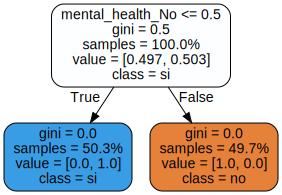

In [ ]:
graph = graphviz.Source(dot_data)
graph

# onehotencoding

In [ ]:
# consultamos el tamaño del data frame
df_encuesta3 = pd.read_excel('survey1edit_v2.1.xlsx')
df_encuesta3.shape

(2007, 30)

In [ ]:
df_encuesta3.treatment.value_counts()

0.0    1007
1.0    1000
Name: treatment, dtype: int64

In [ ]:
# enlistamos las variables disponibles
df_encuesta3.columns.to_list()

['Timestamp',
 'Age',
 'Gender',
 'Country',
 'state',
 'self_employed',
 'family_history',
 'treatment',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence',
 'comments',
 'first_job',
 'time_in_job',
 'mental_health']

In [ ]:
# evaluamos si la variable "Country" se puede considerar para el modelo, revisando si los datos están dispersos en distintos países o si la mayoría se concentra en un solo país
frec = pd.value_counts(df_encuesta3["Country"])
frec_country_df=pd.DataFrame(frec)
frec_country_df.columns = ["count"]
frec_country_df["frec_rel_%"]=100*frec_country_df["count"]/len(df_encuesta3)


In [ ]:
# en base al resultado obtenido, decidimos no considerarla ya que el 60% de los datos se concentran en Estados Unidos y en segundo lugar está Reino Unido con 14%
frec_country_df.head()

,count,frec_rel_%
United States,1194,59.491779
United Kingdom,281,14.000997
Canada,131,6.527155
Germany,71,3.537618
Netherlands,40,1.993024


In [ ]:
# ahora evaluamos la relación entre las variables "treatment" y "work_interference", para revisar si cuando se responde en "treatment" que NO lleva
# un tratamiento mental (lo cual se interpreta que no tiene ningún padecimiento) tiene coherencia con las respuestas de la variable "work_interference" en donde
# se responde si al tener un padecimiento, este interfiere con sus actividades laborales
treatment_work = df_encuesta3.groupby(["treatment", "work_interfere"]).size()
treatment_work = treatment_work.reset_index()
treatment_work = pd.pivot_table(treatment_work,columns="treatment", index="work_interfere", values=0)


In [ ]:
# en base al resultado obtenido, lo que observamos es que si hay coherencia entre las variables, ya que en su mayoría, los encuestados que responden que no llevan un tratamiento mental
# también respondieron que no interfiere con sus actividades, y viceversa, las personas que respondieron que si llevan un tratamiento también respondieron que "a veces" este inrterfiere con su trabajo
treatment_work

treatment,0.0,1.0
work_interfere,,
Never,727,54
Often,34,182
Rarely,80,198
Sometimes,166,566


In [ ]:
df_encuesta3.mental_health = df_encuesta3.treatment

In [ ]:
# eliminamos las variables que no utilizaremos
df_encuesta_ohe = df_encuesta3.drop(['Gender','treatment','Timestamp','Country','state','self_employed','no_employees','benefits','care_options','wellness_program','seek_help','anonymity','leave','mental_health_consequence','phys_health_consequence','coworkers','supervisor','mental_health_interview','phys_health_interview','mental_vs_physical','obs_consequence','comments'], axis=1)

In [ ]:
df_encuesta_ohe.shape

(2007, 8)

In [ ]:
df_encuesta_ohe.columns

Index(['Age', 'family_history', 'work_interfere', 'remote_work',
       'tech_company', 'first_job', 'time_in_job', 'mental_health'],
      dtype='object')

In [ ]:
# creamos una función para crear dummies a partir de las variables disponibles y anexarlas al dataset como columnas

from pandas.core.reshape.reshape import get_dummies
def createdummies (df, varname):
    dummy = pd.get_dummies(df[varname], prefix = varname)
    df = df.drop(varname, axis = 1)
    df = pd.concat([df, dummy], axis = 1)
    return df

In [ ]:
df_encuesta_dummies = createdummies(df_encuesta_ohe,['family_history','remote_work','tech_company','work_interfere'])

In [ ]:
# mostramos las variables disponibles
features_ohe = df_encuesta_dummies.columns.tolist()
features_ohe

['Age',
 'first_job',
 'time_in_job',
 'mental_health',
 'family_history_No',
 'family_history_Yes',
 'remote_work_No',
 'remote_work_Yes',
 'tech_company_No',
 'tech_company_Yes',
 'work_interfere_Never',
 'work_interfere_Often',
 'work_interfere_Rarely',
 'work_interfere_Sometimes']

In [ ]:
df_encuesta_dummies.shape

(2007, 14)

In [ ]:
df_encuesta_dummies.head()

,Age,first_job,time_in_job,mental_health,family_history_No,family_history_Yes,remote_work_No,remote_work_Yes,tech_company_No,tech_company_Yes,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes
0,37.0,21.0,16.0,1.0,1,0,1,0,0,1,0,1,0,0
1,44.0,21.0,23.0,0.0,1,0,1,0,1,0,0,0,1,0
2,32.0,22.0,10.0,0.0,1,0,1,0,0,1,0,0,1,0
3,31.0,22.0,9.0,1.0,0,1,1,0,0,1,0,1,0,0
4,31.0,20.0,11.0,0.0,1,0,0,1,0,1,1,0,0,0


In [ ]:
df_encuesta_dummies.drop(['mental_health'],axis = 1).values

array([[37., 21., 16., ...,  1.,  0.,  0.],
       [44., 21., 23., ...,  0.,  1.,  0.],
       [32., 22., 10., ...,  0.,  1.,  0.],
       ...,
       [50., 21., 29., ...,  0.,  0.,  0.],
       [46., 21., 25., ...,  0.,  0.,  0.],
       [23., 21.,  2., ...,  0.,  0.,  1.]])

In [ ]:
# Separamos al dataset en train y test
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_encuesta_dummies.drop(['mental_health'],axis = 1).values, df_encuesta_dummies['mental_health'].values,
                 test_size=0.2, random_state=24)

In [ ]:
# definimos el número de niveles que tendrá el árbol
dt_dummies = tree.DecisionTreeClassifier(max_depth=2)

In [ ]:
dt_dummies.fit(X_train_1, y_train_1) # Ajustamos el modelo

DecisionTreeClassifier(max_depth=2)

In [ ]:
dot_data_dummies = tree.export_graphviz(dt_dummies,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                proportion=True,
                                feature_names=features_ohe[:-1],
                                class_names=
                                    ['no','si']
                                )

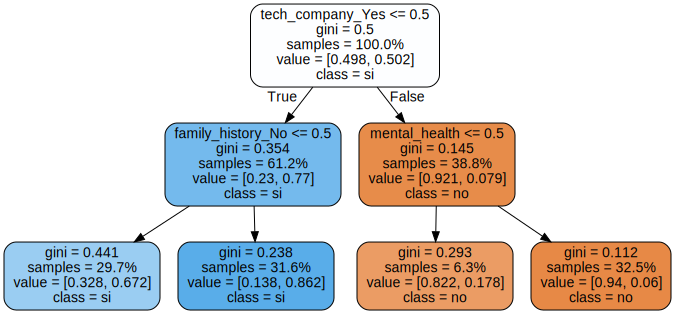

In [ ]:
graph_dummies = graphviz.Source(dot_data_dummies)
graph_dummies

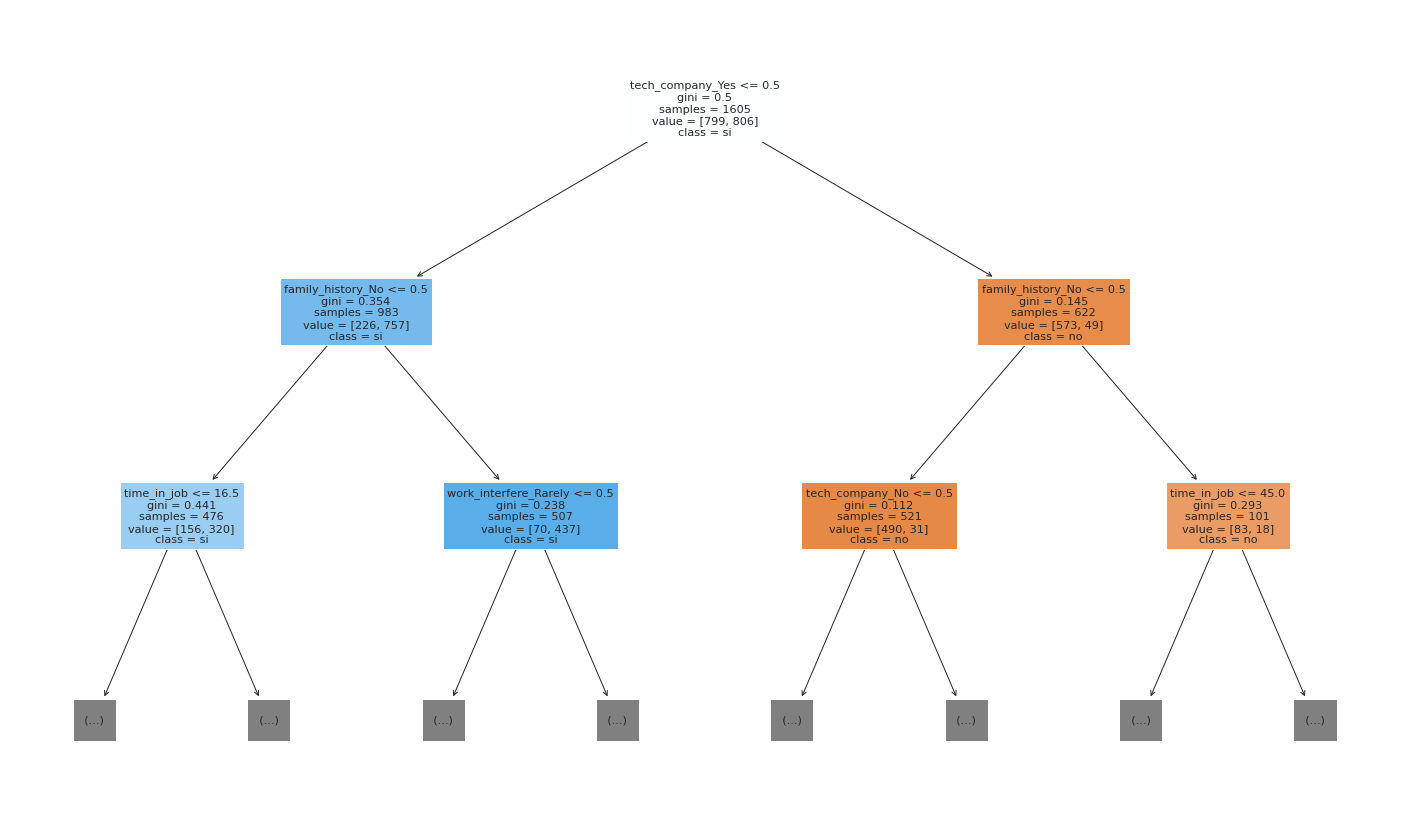

In [ ]:
clf = DecisionTreeClassifier(random_state=24) # random_state sirve para dar reproducibilidad
model = clf.fit(X_train_1, y_train_1)

# Graficando
fig = plt.figure(figsize=(25,15))
tree.plot_tree(clf,
               feature_names = features_ohe[:-1],  
               class_names =  ['no','si'],
               filled=True,
               max_depth=2
               )
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

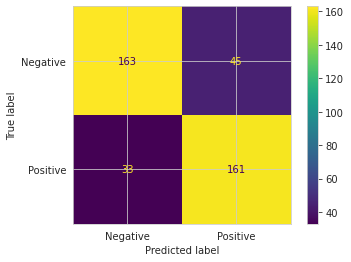

In [ ]:
from sklearn.ensemble import RandomForestClassifier # Usaremos como clasificador un bosque aleatorio
from sklearn.model_selection import train_test_split # vamos a separar nuestro dataset
from sklearn import metrics # vamos a medir el desempeño
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')



# Creamos un modelo Random Forest con parametros por defect
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train_1, y_train_1)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test_1) 


plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelo, X_test_1, y_test_1, display_labels=['Negative', 'Positive'])

In [ ]:
confusion = metrics.confusion_matrix(y_test_1, preds)
confusion
#confusion.ravel()

array([[163,  45],
       [ 33, 161]])

In [ ]:
accuracy = metrics.accuracy_score(y_test_1, preds)
accuracy 

0.8059701492537313

In [ ]:
# Precision se evalua para cada categoria
precision_positiva = metrics.precision_score(y_test_1, preds, pos_label=1)
precision_negativa = metrics.precision_score(y_test_1, preds, pos_label=0)
precision_positiva, precision_negativa 

(0.7815533980582524, 0.8316326530612245)

In [ ]:
recall_sensibilidad = metrics.recall_score(y_test_1, preds, pos_label=1)
recall_especificidad= metrics.recall_score(y_test_1, preds, pos_label=0)
recall_sensibilidad, recall_especificidad

(0.8298969072164949, 0.7836538461538461)

In [ ]:
f1_positivo = metrics.f1_score(y_test_1, preds, pos_label=1)
f1_negativo = metrics.f1_score(y_test_1, preds, pos_label=0)
f1_positivo, f1_negativo 

(0.8049999999999999, 0.806930693069307)

In [ ]:
print(metrics.classification_report(y_test_1, preds))

              precision    recall  f1-score   support

         0.0       0.83      0.78      0.81       208
         1.0       0.78      0.83      0.80       194

    accuracy                           0.81       402
   macro avg       0.81      0.81      0.81       402
weighted avg       0.81      0.81      0.81       402



# Feature Selection : 
## Forward Selection

In [ ]:
df_encuesta_dummies.head() 

,Age,first_job,time_in_job,mental_health,family_history_No,family_history_Yes,remote_work_No,remote_work_Yes,tech_company_No,tech_company_Yes,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes
0,37.0,21.0,16.0,1.0,1,0,1,0,0,1,0,1,0,0
1,44.0,21.0,23.0,0.0,1,0,1,0,1,0,0,0,1,0
2,32.0,22.0,10.0,0.0,1,0,1,0,0,1,0,0,1,0
3,31.0,22.0,9.0,1.0,0,1,1,0,0,1,0,1,0,0
4,31.0,20.0,11.0,0.0,1,0,0,1,0,1,1,0,0,0


In [ ]:
X = df_encuesta_dummies.drop('mental_health', 1)       # feature matrix
y = df_encuesta_dummies['mental_health']               # target feature
df_encuesta_dummies.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Age,first_job,time_in_job,mental_health,family_history_No,family_history_Yes,remote_work_No,remote_work_Yes,tech_company_No,tech_company_Yes,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes
0,37.0,21.0,16.0,1.0,1,0,1,0,0,1,0,1,0,0
1,44.0,21.0,23.0,0.0,1,0,1,0,1,0,0,0,1,0
2,32.0,22.0,10.0,0.0,1,0,1,0,0,1,0,0,1,0
3,31.0,22.0,9.0,1.0,0,1,1,0,0,1,0,1,0,0
4,31.0,20.0,11.0,0.0,1,0,0,1,0,1,1,0,0,0


In [ ]:
X

,Age,first_job,time_in_job,family_history_No,family_history_Yes,remote_work_No,remote_work_Yes,tech_company_No,tech_company_Yes,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes
0,37.0,21.0,16.0,1,0,1,0,0,1,0,1,0,0
1,44.0,21.0,23.0,1,0,1,0,1,0,0,0,1,0
2,32.0,22.0,10.0,1,0,1,0,0,1,0,0,1,0
3,31.0,22.0,9.0,0,1,1,0,0,1,0,1,0,0
4,31.0,20.0,11.0,1,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,46.0,19.0,27.0,1,0,0,1,0,1,1,0,0,0
2003,45.0,21.0,24.0,0,1,1,0,0,1,0,0,0,1
2004,50.0,21.0,29.0,1,0,1,0,0,1,1,0,0,0
2005,46.0,21.0,25.0,1,0,1,0,0,1,1,0,0,0


In [ ]:
y

0       1.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
2002    0.0
2003    1.0
2004    0.0
2005    0.0
2006    1.0
Name: mental_health, Length: 2007, dtype: float64

In [ ]:
import statsmodels.api as sm

# creamos una función para que realice este proceso.
# la función necesita tres parametros y minimamente dos, data y target
# el tercero es opcional, si no se da se toma el valor predefinido SL=0.01
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
forward_selection(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/

['work_interfere_Never',
 'family_history_Yes',
 'family_history_No',
 'work_interfere_Often']

In [ ]:
df_encuesta_dummies.shape

(2007, 14)

Visualizamos que de 14 columnas eligió 4 y me dice que el conjunto de variables óptimo para entrenar al modelo son:
'work_interfere_Never',
'family_history_Yes',
'family_history_No',
'work_interfere_Often'

In [ ]:
!pip install mlxtend  # una libreria con herramientas utiles para DS, en particular nos ahorra la tarea de definir nuestra funcion

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=8,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [ ]:
sfs.fit(X, y)
sfs.k_feature_names_     #Lista final de features

('Age',
 'time_in_job',
 'family_history_Yes',
 'remote_work_No',
 'tech_company_No',
 'work_interfere_Never',
 'work_interfere_Often',
 'work_interfere_Rarely')

## Backward selection

In [ ]:
# creamos una función para que realice este proceso.
# la función necesita tres parametros y minimamente dos, data y target
# el tercero es opcional, si no se da, se toma el valor predefinido SL=0.05

def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [ ]:
backward_elimination(X,y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

['Age',
 'family_history_Yes',
 'work_interfere_Often',
 'work_interfere_Rarely',
 'work_interfere_Sometimes']

Visualizamos que nos dan distintas variables para entrenar el modelo. 

# Metricas algoritmos de clasificacion

In [ ]:
# definimos matriz de diseño X y vector respuesta y
X = df_encuesta_dummies.drop('mental_health', 1)
y = abs(pd.Series(df_encuesta_dummies['mental_health'])-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
# Separamos en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

# Creamos un modelo Random Forest con parametros por defect
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

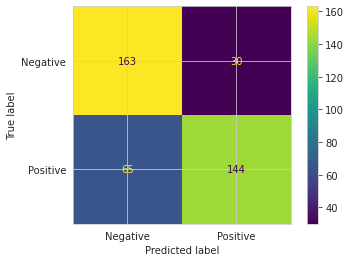

In [ ]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelo, X_test, y_test, display_labels=['Negative', 'Positive'])

In [ ]:
confusion = metrics.confusion_matrix(y_test, preds)
confusion
#confusion.ravel()

array([[163,  30],
       [ 65, 144]])

In [ ]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy 

0.763681592039801

In [ ]:
# Precision se evalua para cada categoria
precision_positiva = metrics.precision_score(y_test, preds, pos_label=1)
precision_negativa = metrics.precision_score(y_test, preds, pos_label=0)
precision_positiva, precision_negativa 

(0.8275862068965517, 0.7149122807017544)

In [ ]:
recall_sensibilidad = metrics.recall_score(y_test, preds, pos_label=1)
recall_especificidad= metrics.recall_score(y_test, preds, pos_label=0)
recall_sensibilidad, recall_especificidad

(0.6889952153110048, 0.844559585492228)

In [ ]:
f1_positivo = metrics.f1_score(y_test, preds, pos_label=1)
f1_negativo = metrics.f1_score(y_test, preds, pos_label=0)
f1_positivo, f1_negativo 

(0.7519582245430809, 0.7743467933491686)

In [ ]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.71      0.84      0.77       193
         1.0       0.83      0.69      0.75       209

    accuracy                           0.76       402
   macro avg       0.77      0.77      0.76       402
weighted avg       0.77      0.76      0.76       402



# Descarga de datos desde APIs públicas

In [ ]:
!pip install sodapy
# https://dev.socrata.com/foundry/data.cdc.gov/yni7-er2q
# https://data.cdc.gov/resource/yni7-er2q.json
import requests
import json
import pandas as pd
from sodapy import Socrata
apikey = "3O6FP1J68vEMC9HdGTPjupHdo"
client = Socrata("data.cdc.gov", apikey)
results = client.get("yni7-er2q", limit=10000)
df = pd.DataFrame.from_records(results)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 861 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import pandas as pd
import requests
import io
url='https://raw.githubusercontent.com/natashainspace/predicting_burnout/main/employees.csv'
r= requests.get(url)
print(r)

<Response [200]>


In [ ]:
# mostramos el dataset
c=r.content
df_burnout=pd.read_csv(io.StringIO(c.decode('utf-8')))
df_burnout.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# consultamos el número de filas y columnas
df_burnout.shape

(1470, 35)

In [ ]:
# consultamos el tipo de dato de cada columna
df_burnout.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
# mostramos las variables disponibles
df_burnout.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# realizamos una consulta para revisar si existen valores duplicados
df_burnout.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [ ]:
# realizamos una suma de los valores duplicados, y al obtener como resultado "0" confirmamos que no existen duplicados en el dataset
df_burnout.duplicated().sum()

0

In [ ]:
# realizamos una consulta para revisar si existen valores vacíos
df_burnout.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# realizamos una suma de los valores vacíos, y al obtener como resultado "0" confirmamos que no existen valores vacíos en el dataset
df_burnout.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
# contamos las frecuencias los valores unicos en la primera columna Edad
df_burnout.Age.value_counts() 

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

Visualizamos que la mayoria que participo tiene alrededor de 30 a 35 años.

In [ ]:
# contamos las frecuencias los valores unicos en la columna Ingreso Mensual
df_burnout.MonthlyIncome.value_counts()

2342     4
6142     3
2741     3
2559     3
2610     3
        ..
7104     1
2773     1
19513    1
3447     1
4404     1
Name: MonthlyIncome, Length: 1349, dtype: int64

Notamos que puede variar mucho segun la persona, pero que lo más comun sobre el ingreso mensual en el trabajo es entre 2300 y 2800 dolares.

In [ ]:
# contamos las frecuencias los valores unicos de la columna Campo de Educación 
df_burnout.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

# **Data Storytelling**

**Salud Mental**

Cuando hablamos de mantenernos saludables, siempre lo hacemos desde un punto de vista físico pero, ¿Qué hay de la salud mental?, ¿Qué tanto nos preocupamos por tener una buena salud mental?

Hoy en día, mas que en algún otro punto de la historia, estamos expuestos a distintos factores que alteran o ponen en riesgo nuestro bienestar mental; antes debíamos preocuparnos por evitar ser devorados por un animal salvaje, y ahora debemos preocuparnos por no ser devorados por el estres y la ansiedad que genera el estar expuesto a la demanda y recepción de demasiada información, todo requiere nuestra atención y a la vez queremos consumir todo lo que vemos.

Pero a todo esto, ¿Qué es la salud mental? De manera resumida, no es mas que la ausencia de trastornos mentales, y en un sentido mas amplio es un estado de bienestar por medio del cual los individuos reconocen sus habilidades, son capaces de hacer frente al estrés normal de la vida, trabajar de forma productiva y fructífera, y contribuir a sus comunidades. Salud mental se refiere a la posibilidad de acrecentar la competencia de los individuos y comunidades y permitirles alcanzar sus propios objetivos.



La salud mental es materia de interés para todos, y no sólo para aquellos afectados por un trastorno mental.

Debemos tener en cuenta que la salud mental es una parte importante de nuestro bienestar, algo que debemos cuidar, y de padecer un transtorno, no es algo que solo esté en nuestra cabeza o algo por lo que nos debamos sentir avergonzados.


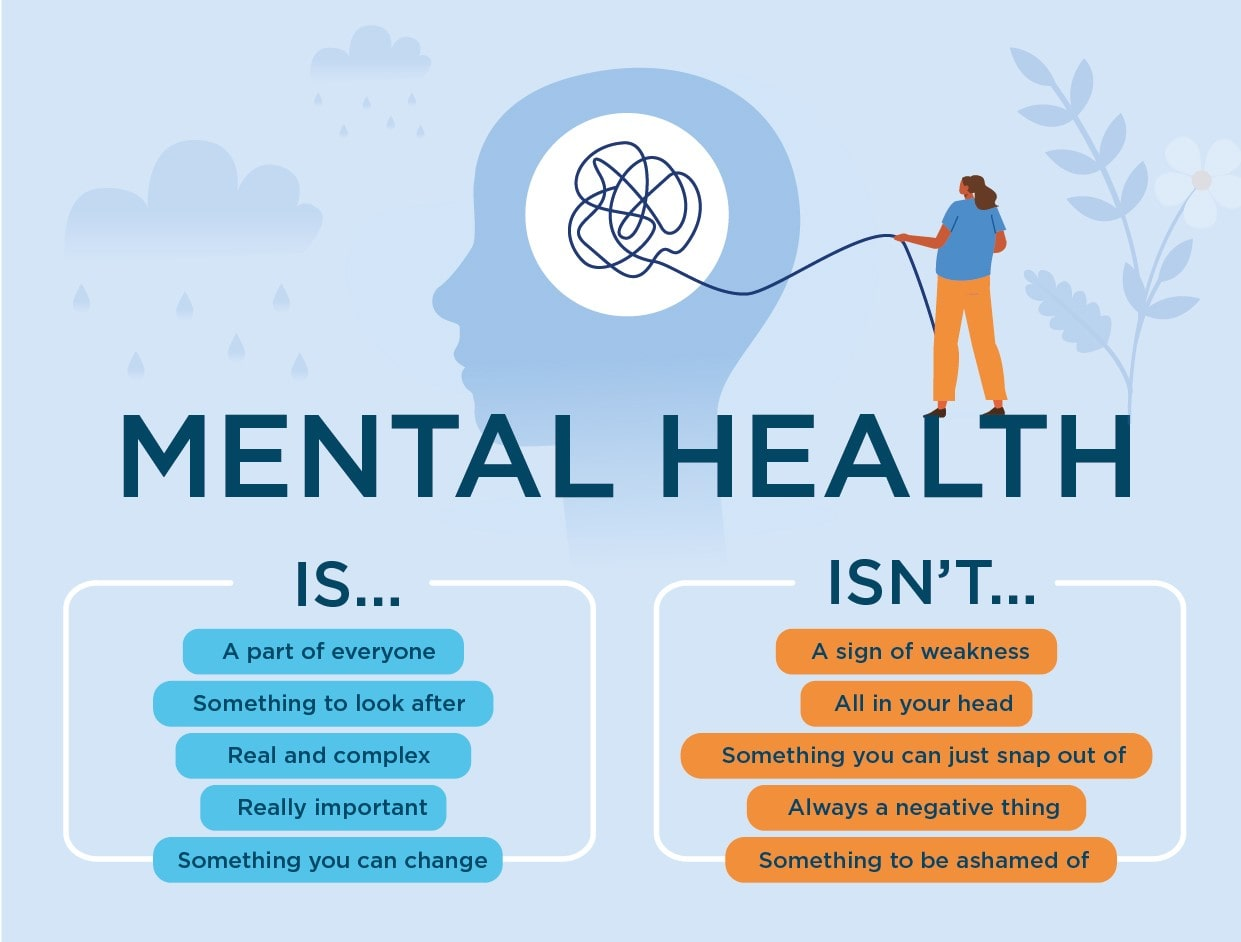

In [ ]:
df_encuesta = pd.read_excel('survey1edit_v2.xlsx')
df_encuesta.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,first_job,time_in_job
0,2014-08-27 11:29:00,37.0,Female,United States,IL,No,No,Yes,Often,30-50,...,No,Some of them,Yes,No,Maybe,Yes,No,NaN,21.0,16.0
1,2014-08-27 11:29:00,44.0,Male,United States,IN,No,No,No,Rarely,1000-5000,...,No,No,No,No,No,Don't know,No,NaN,21.0,23.0
2,2014-08-27 11:29:00,32.0,Male,Canada,NaN,No,No,No,Rarely,30-50,...,No,Yes,Yes,Yes,Yes,No,No,NaN,22.0,10.0
3,2014-08-27 11:29:00,31.0,Male,United Kingdom,NaN,No,Yes,Yes,Often,50-100,...,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,22.0,9.0
4,2014-08-27 11:30:00,31.0,Male,United States,TX,No,No,No,Never,100-500,...,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,20.0,11.0


Buscaremos por países las personas que fueron tratadas o no por una condición de salud mental:

In [ ]:
df_encuesta.Country.value_counts() #contamos las veces que aparece cada país en la encuesta

United States             1194
United Kingdom             281
Canada                     131
Germany                     71
Netherlands                 40
Australia                   39
Ireland                     38
France                      23
India                       16
Poland                      13
New Zealand                 12
Switzerland                 12
Italy                       11
South Africa                10
Sweden                      10
Brazil                       9
Belgium                      8
Israel                       8
Bulgaria                     7
Singapore                    6
Austria                      6
Russia                       6
Finland                      5
Mexico                       5
Portugal                     5
Colombia                     4
Croatia                      3
Norway                       2
Hungary                      2
Thailand                     2
Nigeria                      2
Japan                        2
Denmark 

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [ ]:
Country = pd.DataFrame(list(zip(df_encuesta.Country.value_counts().index,df_encuesta.Country.value_counts())), columns=['Country','value'], index=None)

In [ ]:
# Generamos un wordcloud con los valores que se encuentran en Country
catcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=1200,
                          height=800
                         ).generate(" ".join(Country['Country'].values))

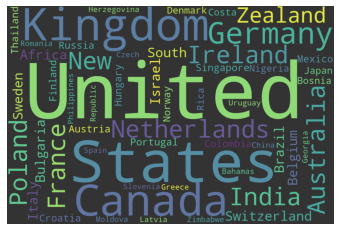

In [ ]:
plt.imshow(catcloud, alpha=0.8)
plt.axis('off')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Países que participaron en la encuesta ')

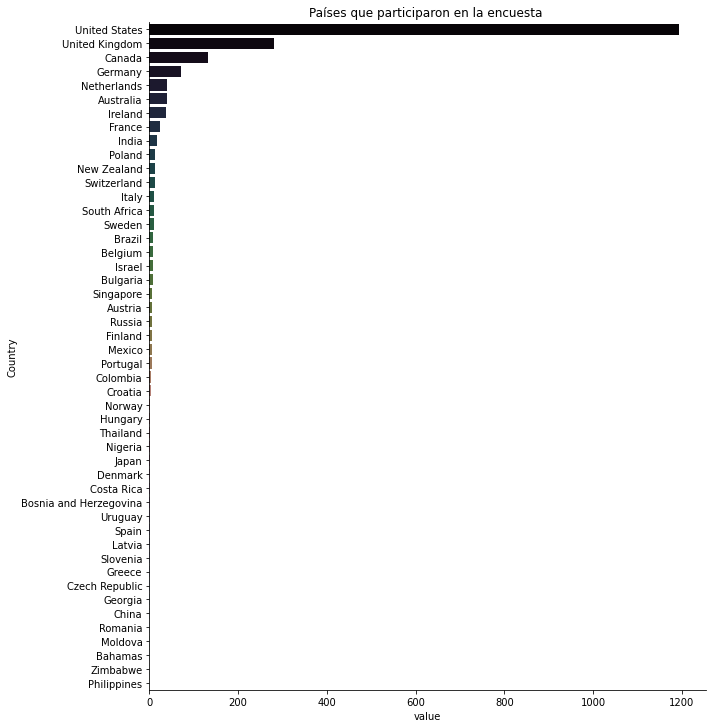

In [ ]:
# Generamos el factorplot
sns.factorplot(x='value', y = 'Country', data=Country,kind="bar", size=10, aspect=1, palette="cubehelix")
plt.title('Países que participaron en la encuesta ')

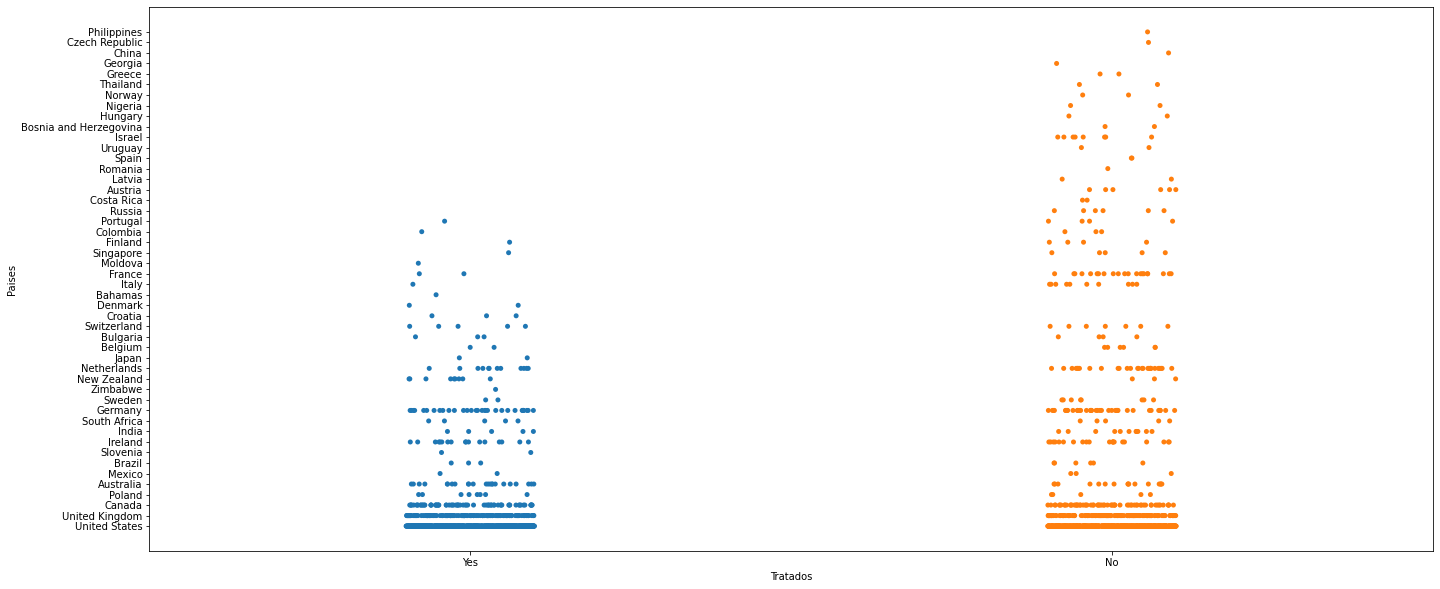

In [ ]:
fig = plt.figure(figsize=(23, 10)) # creo una figura con un tamaño particular
ax = sns.stripplot(data=df_encuesta, x="treatment", y="Country")
ax.set(xlabel='Tratados', ylabel='Paises') # configuro los nombres de los ejes
plt.show()

In [ ]:
df_encuesta.treatment.value_counts()

No     1007
Yes    1000
Name: treatment, dtype: int64

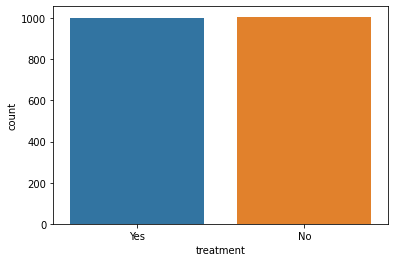

In [ ]:
sns.countplot(data=df_encuesta, x="treatment")

Filtramos por el país que más participo en la encuesta: United States.

In [ ]:
df_encuesta_eeuu = pd.read_excel('survey1edit_v2_UnitedStates.xlsx') #llamamos al data set que solo tiene a EEUU
df_encuesta_eeuu.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,first_job,time_in_job
0,2014-08-27 11:29:00,37,Female,United States,IL,No,No,Yes,Often,30-50,...,No,Some of them,Yes,No,Maybe,Yes,No,NaN,21,16
1,2014-08-27 11:29:00,44,Male,United States,IN,No,No,No,Rarely,1000-5000,...,No,No,No,No,No,Don't know,No,NaN,21,23
2,2014-08-27 11:30:00,31,Male,United States,TX,No,No,No,Never,100-500,...,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,20,11
3,2014-08-27 11:31:00,33,Male,United States,TN,Yes,Yes,No,Sometimes,30-50,...,No,Yes,Yes,No,Maybe,Don't know,No,NaN,21,12
4,2014-08-27 11:31:00,35,Female,United States,MI,No,Yes,Yes,Sometimes,500-700,...,Maybe,Some of them,No,No,No,Don't know,No,NaN,19,16


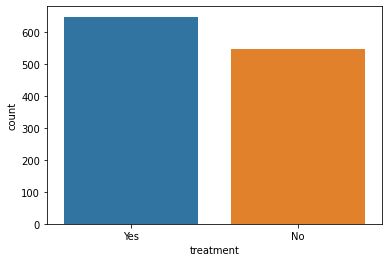

In [ ]:
sns.countplot(data=df_encuesta_eeuu, x="treatment")

In [ ]:
df_encuesta_eeuu.treatment.value_counts()

Yes    647
No     547
Name: treatment, dtype: int64

Visualizamos que las personas que participaron de Estados Unidos se encuentran más en tratamiento por una condición de salud mental